<a href="https://colab.research.google.com/github/albertomendess/Data-Science/blob/main/An%C3%A1lise_de_Vacina%C3%A7%C3%A3o_em_Pernambuco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = 'https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-04-28/uf%3DPE/part-00000-7ab10ee1-6a0f-4ed9-b84c-9afb98b4efc2.c000.csv'

In [ ]:
!mkdir -p "/content/drive/MyDrive/Colab Notebooks/VacinasPE"

In [ ]:
!wget -P "/content/drive/MyDrive/Colab Notebooks/VacinasPE" https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-04-28/uf%3DPE/part-00000-7ab10ee1-6a0f-4ed9-b84c-9afb98b4efc2.c000.csv

--2021-04-29 19:57:28--  https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-04-28/uf%3DPE/part-00000-7ab10ee1-6a0f-4ed9-b84c-9afb98b4efc2.c000.csv
Resolving s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)... 52.95.165.10
Connecting to s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)|52.95.165.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 923802459 (881M) [text/csv]
Saving to: ‘/content/drive/MyDrive/Colab Notebooks/VacinasPE/part-00000-7ab10ee1-6a0f-4ed9-b84c-9afb98b4efc2.c000.csv.1’

part-00000-7ab10ee1 100%[===================>] 881.01M  24.0MB/s    in 40s     

2021-04-29 19:58:09 (22.2 MB/s) - ‘/content/drive/MyDrive/Colab Notebooks/VacinasPE/part-00000-7ab10ee1-6a0f-4ed9-b84c-9afb98b4efc2.c000.csv.1’ saved [923802459/923802459]



In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set()

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VacinasPE/part-00000-7ab10ee1-6a0f-4ed9-b84c-9afb98b4efc2.c000.csv', sep= ';')

In [4]:
df.head(4)

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,3c6bed23-b759-4d65-8cb4-3fa9518a33e9-i0b0,5c232ca807a1f8400c192c58600dddab96f6cd2ab213d6...,88,1932-08-15,F,4,AMARELA,260345.0,10.0,CAMARAGIBE,BRASIL,PE,54786.0,B,2346117,MUNICIPIO DE CAMARAGIBE,USF BAIRRO NOVO I,260345,CAMARAGIBE,PE,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,210016,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-12T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-24 15:53:18,16341
1,0b8e2f2c-4877-4f6c-836b-b2339570948a-i0b0,6308ed94e0bca060b4211a746e3a45843173810ae4c4f9...,71,1949-06-08,F,4,AMARELA,261360.0,10.0,SAO JOSE DO EGITO,BRASIL,PE,56700.0,B,2635666,PREFEITURA MUNICIPAL DE SAO JOSE DO EGITO,ESF RIACHO DO MEIO I,261360,SAO JOSE DO EGITO,PE,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210080,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-23T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-26 10:26:09,16341
2,7149215c-f673-40e0-8fe4-a73f405b8928-i0b0,626f3937c13322f4d8b8bf82468dd9b0c8689d9a3e1748...,68,1953-02-18,F,4,AMARELA,261640.0,10.0,VITORIA DE SANTO ANTAO,BRASIL,PE,NaN,B,2638045,FUNDO MUNICIPAL DE SAUDE DE VITORIA DE SANTO A...,U S F ALTO JOSE LEAL,261640,VITORIA DE SANTO ANTAO,PE,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210148,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-24T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-24 15:09:04,16341
3,e4635300-a5ce-464f-a0a5-c450c4a17daf-i0b0,17259b3b143eb47f17b15ee6895e9c76811703650588ea...,79,1942-03-25,F,4,AMARELA,260140.0,10.0,BARREIROS,BRASIL,PE,55560.0,B,7620349,PREFEITURA MUNICIPAL DOS BARREIROS,PSF JOSICLEIDE MARIA DA SILVA SOUZA,260140,BARREIROS,PE,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,4120Z025,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-03-31T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-04-05 23:12:45,16341


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677634 entries, 0 to 1677633
Data columns (total 34 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   document_id                               1677634 non-null  object 
 1   paciente_id                               1677634 non-null  object 
 2   paciente_idade                            1677634 non-null  int64  
 3   paciente_dataNascimento                   1677634 non-null  object 
 4   paciente_enumSexoBiologico                1677634 non-null  object 
 5   paciente_racaCor_codigo                   1677634 non-null  int64  
 6   paciente_racaCor_valor                    1677634 non-null  object 
 7   paciente_endereco_coIbgeMunicipio         1667030 non-null  float64
 8   paciente_endereco_coPais                  1667042 non-null  float64
 9   paciente_endereco_nmMunicipio             1667037 non-null  object 
 10  pacien

In [6]:
df.describe(include= 'all').round(3)

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
count,1677634,1677634,1677634.000,1677634,1677634,1677634.000,1677634,1667030.000,1667042.000,1667037,1667042,1667030,1484868.000,1674560,1677634.000,1677634,1677634,1677634.000,1677634,1677634,1677634.000,1674903,1674903.000,1674903,1677634,1677634,1268107,1677634,1677634,1677634.000,1677634,1677634,1677634,1677634.000
unique,1676417,1185934,NaN,31330,2,NaN,6,NaN,NaN,2726,4,28,NaN,3,NaN,300,1492,NaN,185,1,NaN,66,NaN,15,116,7,3,201,3,NaN,5,2,901333,NaN
top,c0b141b0-26bd-41fc-933d-dfa538090f5c-i0b0,a0bc3145af1c7b0c8e0b0cda4c934396fe28e76b7f1f89...,NaN,1950-01-20,F,NaN,SEM INFORMACAO,NaN,NaN,RECIFE,BRASIL,PE,NaN,B,NaN,MUNICIPIO DO RECIFE,SECRETARIA DE SAUDE DO JABOATAO DOS GUARARAPES,NaN,RECIFE,PE,NaN,Pessoas de 70 a 74 anos,NaN,Faixa Etária,210114,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-30T03:00:00.000Z,1ª Dose,NaN,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-22 14:04:17,NaN
freq,2,6,NaN,472,1016841,NaN,518285,NaN,NaN,404982,1667035,1590889,NaN,1670590,NaN,269865,70758,NaN,470072,1677634,NaN,306479,NaN,1158542,221068,1008757,1008757,45993,1166930,NaN,1355064,1268107,5111,NaN
mean,NaN,NaN,63.657,NaN,NaN,32.524,NaN,262900.468,10.001,NaN,NaN,NaN,53695.309,NaN,4030607.349,NaN,NaN,260893.634,NaN,NaN,394.953,NaN,3.882,NaN,NaN,NaN,NaN,NaN,NaN,85.865,NaN,NaN,NaN,16892.932
std,NaN,NaN,17.282,NaN,NaN,44.459,NaN,18873.004,0.386,NaN,NaN,NaN,6488.946,NaN,2637680.157,NaN,NaN,412.663,NaN,NaN,307.613,NaN,3.000,NaN,NaN,NaN,NaN,NaN,NaN,0.536,NaN,NaN,NaN,971.231
min,NaN,NaN,0.000,NaN,NaN,1.000,NaN,110001.000,10.000,NaN,NaN,NaN,0.000,NaN,19.000,NaN,NaN,260005.000,NaN,NaN,0.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,85.000,NaN,NaN,NaN,16341.000
25%,NaN,NaN,56.000,NaN,NaN,3.000,NaN,260570.000,10.000,NaN,NaN,NaN,52130.000,NaN,2427648.000,NaN,NaN,260580.000,NaN,NaN,202.000,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN,86.000,NaN,NaN,NaN,16341.000
50%,NaN,NaN,68.000,NaN,NaN,4.000,NaN,261050.000,10.000,NaN,NaN,NaN,55240.000,NaN,2714701.000,NaN,NaN,261070.000,NaN,NaN,204.000,NaN,2.000,NaN,NaN,NaN,NaN,NaN,NaN,86.000,NaN,NaN,NaN,16341.000
75%,NaN,NaN,75.000,NaN,NaN,99.000,NaN,261160.000,10.000,NaN,NaN,NaN,55850.000,NaN,6508510.000,NaN,NaN,261160.000,NaN,NaN,701.000,NaN,7.000,NaN,NaN,NaN,NaN,NaN,NaN,86.000,NaN,NaN,NaN,16341.000


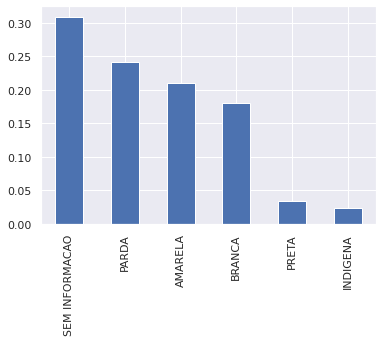

In [7]:
df.paciente_racaCor_valor.value_counts(normalize=True).plot(kind='bar')

In [17]:
df.paciente_racaCor_valor.value_counts(normalize= True) * 100

SEM INFORMACAO    30.893806
PARDA             24.227990
AMARELA           21.077661
BRANCA            18.020796
PRETA              3.349658
INDIGENA           2.430089
Name: paciente_racaCor_valor, dtype: float64

In [9]:
df.estabelecimento_razaoSocial.value_counts(normalize= True)

MUNICIPIO DO RECIFE                                 1.608605e-01
PREFEITURA DA CIDADE DO RECIFE                      1.038921e-01
PREFEITURA MUNICIPAL JABOATAO DOS GUARARAPES        4.217726e-02
CENTRAL MUNICIPAL DE REDE DE FRIOS CMRF             3.093583e-02
MUNICIPIO DE PETROLINA                              2.920005e-02
                                                        ...     
PREFEIRUTA MUNICIPAL DE PESQUEIRA                   5.960776e-06
PREFEITURA MUNICIAPAL DE CARUARU                    5.364698e-06
PREFEITURA MUNICIPAL DE SANTA CRUZ DO CAPIBARIBE    4.172543e-06
MUNICIPIO DE LAGOA DO CARRO                         1.788233e-06
PREFEITURA MINICIPAL DO IPOJUCA                     5.960776e-07
Name: estabelecimento_razaoSocial, Length: 300, dtype: float64

In [26]:
porcentagem_tipo_de_vacina = df.vacina_fabricante_nome.value_counts(normalize= True) * 100
porcentagem_tipo_de_vacina

FUNDACAO BUTANTAN               60.129742
SERUM INSTITUTE OF INDIA LTD    20.640676
FUNDACAO OSWALDO CRUZ           14.040369
SINOVAC LIFE SCIENCE CO LTD      3.762799
MINISTERIO DA SAUDE              1.418903
BioNTech/Fosun Pharma/Pfizer     0.006795
Janssen-Cilag                    0.000715
Name: vacina_fabricante_nome, dtype: float64

In [11]:
df.groupby(['paciente_idade', 'vacina_grupoAtendimento_nome']).count()

document_id  ...  id_sistema_origem
paciente_idade vacina_grupoAtendimento_nome                      ...                   
0              Outros                                         1  ...                  1
               Pessoas de 60 a 64 anos                        1  ...                  1
1              Pessoas de 75 a 79 anos                        2  ...                  2
               Pessoas de 80 anos ou mais                     1  ...                  1
2              Povos indígenas em terras indígenas            1  ...                  1
...                                                         ...  ...                ...
121            Pessoas de 75 a 79 anos                        1  ...                  1
               Pessoas de 80 anos ou mais                     3  ...                  3
               Recepcionista                                  2  ...                  2
               Técnico de Enfermagem                          9  ...                  9
               Técnico de Odontologia                         2  ...                  2

[3207 rows x 32 columns]

In [12]:
df[df.paciente_idade == 0]

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
467452,9481bee1-9232-4d1b-9b88-09413fbca2cb-i0b0,5567ccfb4bf2c8c2e43891be77fc610bfc9622780fc92e...,0,2020-08-03,F,1,BRANCA,261260.0,10.0,SANTA MARIA DA BOA VISTA,BRASIL,PE,56380.0,B,3935639,MUNICIPIO DE SANTA MARIA DA BOA VISTA,USF RAIMUNDO BEDOR,261260,SANTA MARIA DA BOA VISTA,PE,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,213VCD012Z,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-04-20T03:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-04-22 21:19:10,16341
1415714,250c8ec7-1384-41d8-8440-cc73d4dc1c99-i0b0,65ed77a4e610bf3b73fc1eab54b4eece26bb5e694dec00...,0,2021-01-22,M,3,PARDA,292595.0,10.0,RAFAEL JAMBEIRO,BRASIL,BA,44520.0,B,1392,PREFEITURA DA CIDADE DO RECIFE,US 148 CS DOM MIGUEL DE LIMA VALVERDE,261160,RECIFE,PE,926,Outros,9.0,Trabalhadores de Saúde,202009014,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-22T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-15 12:41:11,16341


In [13]:
df.vacina_dataAplicacao = pd.to_datetime(df.vacina_dataAplicacao)

In [14]:
df['vacina_dataAplicacao_date'] = df.vacina_dataAplicacao.dt.date

In [15]:
df.vacina_dataAplicacao_date.value_counts()

2021-03-30    54740
2021-03-29    50386
2021-03-24    47303
2021-03-25    44261
2021-04-20    43342
              ...  
2021-01-24     1324
2021-02-07      524
2021-01-18       28
2021-01-17        9
2021-01-12        5
Name: vacina_dataAplicacao_date, Length: 102, dtype: int64

In [16]:
df.vacina_dataAplicacao.sort_values()

1540170   2021-01-12 00:00:00+00:00
1121270   2021-01-12 00:00:00+00:00
187662    2021-01-12 00:00:00+00:00
1263954   2021-01-12 00:00:00+00:00
1548713   2021-01-12 00:00:00+00:00
                     ...           
494614    2021-04-27 03:00:00+00:00
581524    2021-04-27 03:00:00+00:00
581516    2021-04-27 03:00:00+00:00
481620    2021-04-27 03:00:00+00:00
573630    2021-04-27 03:00:00+00:00
Name: vacina_dataAplicacao, Length: 1677634, dtype: datetime64[ns, UTC]

In [21]:
df['vacina_grupoAtendimento_nome'].unique()

array(['Pessoas de 80 anos ou mais', 'Pessoas de 70 a 74 anos',
       'Pessoas de 65 a 69 anos', 'Pessoas de 75 a 79 anos',
       'Pessoas de 60 a 64 anos', 'Outros', 'Quilombola',
       'Policial Militar', 'Povos indígenas em terras indígenas',
       'Enfermeiro(a)', 'Recepcionista',
       'Pessoas de 60 nos ou mais Institucionalizadas',
       'Técnico de Enfermagem', 'Nutricionista', 'Policial Civil',
       'Funcionário do Sistema Funerário c/ cadáveres potencialmente contaminados',
       'Odontologista', 'Fisioterapeutas', 'Pessoal da Limpeza',
       'Psicólogo', 'Médico', 'Biomédico', 'Segurança',
       'Pessoas com Deficiência Institucionalizadas',
       'Técnico de Odontologia', 'Farmacêutico',
       'Cozinheiro e Auxiliares', 'Fonoaudiólogo', 'Cuidador de Idosos',
       'Motorista de Ambulância', 'Assistente Social',
       'Auxiliar de Enfermagem', 'Obesidade Grave (Imc>=40)',
       'Profissionais de Educação Física', 'Trabalhadores Industriais',
       'Estudante

In [23]:
print('De %s até %s anos' % (df.paciente_idade.min(), df.paciente_idade.max()))

De 0 até 121 anos


In [41]:
df.paciente_racaCor_valor.value_counts()

SEM INFORMACAO    518285
PARDA             406457
AMARELA           353606
BRANCA            302323
PRETA              56195
INDIGENA           40768
Name: paciente_racaCor_valor, dtype: int64

In [30]:
df.paciente_idade.value_counts(normalize=True) * 100

70     4.360307
71     4.180828
72     4.027696
73     3.898824
65     3.780980
         ...   
10     0.000060
119    0.000060
3      0.000060
2      0.000060
120    0.000060
Name: paciente_idade, Length: 120, dtype: float64

In [31]:
frequencia = df['paciente_enumSexoBiologico'].value_counts()
frequencia

F    1016841
M     660793
Name: paciente_enumSexoBiologico, dtype: int64

In [32]:
percentual = df.paciente_enumSexoBiologico.value_counts(normalize=True) * 100
percentual

F    60.611611
M    39.388389
Name: paciente_enumSexoBiologico, dtype: float64

In [33]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia,
                                       'Porcentagem (%)': percentual})

In [34]:
dist_freq_qualitativas

,Frequência,Porcentagem (%)
F,1016841,60.611611
M,660793,39.388389


In [39]:
dist_freq_qualitativas.rename_axis('Sexo', axis='columns', inplace=True)

In [40]:
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
F,1016841,60.611611
M,660793,39.388389


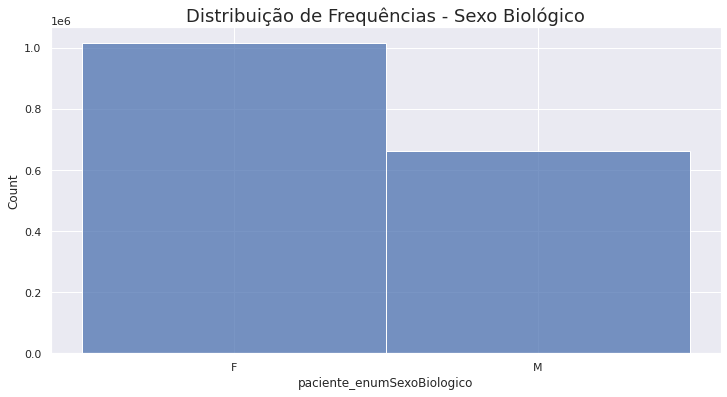

In [46]:
ax = sns.histplot(df.paciente_enumSexoBiologico)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Sexo Biológico',
             fontsize=18)
ax

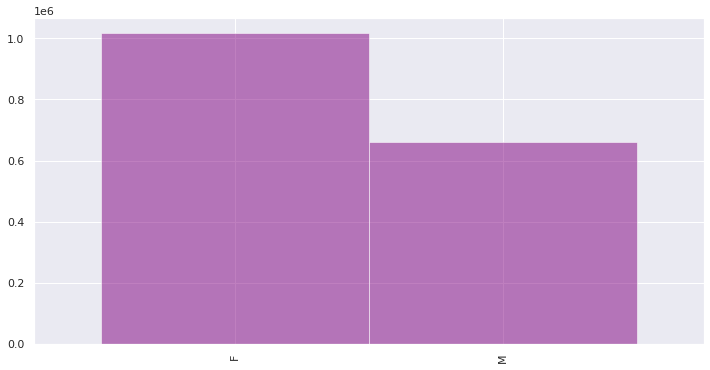

In [53]:
dist_freq_qualitativas['Frequência'].plot.bar(width=1,
                                              color='purple',
                                              alpha=.5,
                                              figsize=(12, 6))

In [55]:
df.groupby(['paciente_racaCor_valor'])['paciente_idade'].mean()

paciente_racaCor_valor
AMARELA           64.345622
BRANCA            63.779868
INDIGENA          42.705553
PARDA             64.161343
PRETA             64.341578
SEM INFORMACAO    64.294853
Name: paciente_idade, dtype: float64